In [1]:
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
from src import *

In [2]:
n = 100
alpha = 1e-7

training_time = 300  # training time/
testing_time = 100
dt = 0.01

w_in_sigma = 0.004

gateR = 2.7e4
gateC = 8.98e-7
pinchoff = -0.6

parameters = dict()
parameters["transconductance"] = {"mean": 0.582e-3, "stddev": 0.0582e-3}
parameters["channel-width"] = {"mean": 200e-6, "stddev": 0}
parameters["channel-length"] = {"mean": 101e-6, "stddev": 0}
parameters["pinchoff-voltage"] = {"mean": pinchoff, "stddev": 0}  # pinch-off voltage
parameters["weighting-resistor"] = {"mean": 500, "stddev": 100}
parameters["gate-capacitance"] = {"mean": gateC, "stddev": 0.1 * gateC}
parameters["gate-resistance"] = {"mean": gateR, "stddev": 0.1 * gateR}
parameters["applied-drain-voltage"] = {"mean": -0.05, "stddev": 0}

# system
D = 3
r_dist = uniform(100, 500)
delta_dist = norm(scale=0.005)
p = 6 / n
sigma = 10
rho = 28
beta = 8 / 3

In [3]:
u0list = generate_initial_conditions(
    10,
    [-7.4, -11.1, 20],
    delta_dist,
    5000,
    0.001,
    lorenz,
    sigma=10,
    rho=28,
    beta=8 / 3,
)

In [4]:
u0 = u0list[0].copy()

# OECT parameters
Vdinit, R, Rg, Cg, Vp, Kp, W, L = generate_OECT_parameters(n, parameters)

A = erdos_renyi_network(n, p, r_dist)

w_in = input_layer(D, n, w_in_sigma)

In [5]:
w_out, u0, r0, V1_0 = train_oect_reservoir(
    u0,
    training_time,
    dt,
    w_in,
    A,
    alpha,
    Vdinit,
    R,
    Rg,
    Cg,
    Vp,
    Kp,
    W,
    L,
    lorenz,
    sigma=sigma,
    rho=rho,
    beta=beta,
)

In [6]:
t, signal, prediction = run_oect_reservoir_autonomously(
    u0,
    r0,
    V1_0,
    testing_time,
    dt,
    w_in,
    w_out,
    A,
    Vdinit,
    R,
    Rg,
    Cg,
    Vp,
    Kp,
    W,
    L,
    lorenz,
    sigma=sigma,
    rho=rho,
    beta=beta,
)

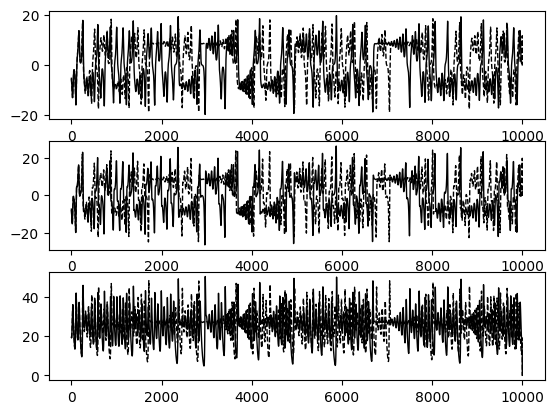

In [7]:
linewidth = 1
plt.figure()
plt.subplot(311)
plt.plot(signal[:,0], 'k-', linewidth=linewidth)
plt.plot(prediction[:,0], 'k--', linewidth=linewidth)

plt.subplot(312)
plt.plot(signal[:,1], 'k-', linewidth=linewidth)
plt.plot(prediction[:,1], 'k--', linewidth=linewidth)

plt.subplot(313)
plt.plot(signal[:,2], 'k-', linewidth=linewidth)
plt.plot(prediction[:,2], 'k--', linewidth=linewidth)